In [ ]:
!pip install pgmpy

In [6]:
#1
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# (b)
model = BayesianNetwork([("A", "C"), ("C", "D"), ("B", "D")])

cpd_A = TabularCPD(variable="A", variable_card=2, values=[[0.9], [0.1]])
cpd_B = TabularCPD(variable="B", variable_card=2, values=[[0.5], [0.5]])

cpd_C = TabularCPD(variable="C", variable_card=2,
                   values=[[0.7, 0.8],
                           [0.3, 0.2]],
                   evidence=["A"], evidence_card=[2])

cpd_D = TabularCPD(variable="D", variable_card=2,
                   values=[[0.8, 0.5, 0.4, 0.3],
                           [0.2, 0.5, 0.6, 0.7]],
                   evidence=["B", "C"], evidence_card=[2, 2])


model.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D)

assert model.check_model()

# (c)
inference = VariableElimination(model)
prob = inference.query(variables=["D"]).values[0]  # P(D=0)

print(prob)


0.542


Output()

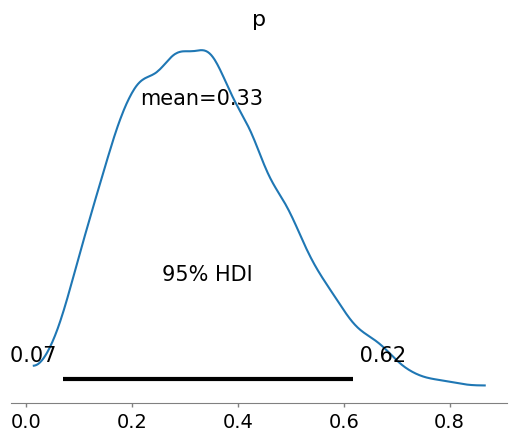

Media: 0.3310


In [10]:
#2 (c)
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

with pm.Model() as model:
    p = pm.Beta("p", 3, 6)
    trace = pm.sample(5000, return_inferencedata=True, chains=2)

az.plot_posterior(trace, var_names=["p"], hdi_prob=0.95)
plt.show()

medie_distributie = trace.posterior["p"].mean().item()
print(f"Media: {medie_distributie:.4f}")